# Домашнее задание 10-11

(прислать до 02:00 07.05.2019)

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне в Piazza через Private Post.
Файл с Вашим решением должен называться ```Surname_HW#```, где вместо ```Surname``` Вы пишите свою фамилию латиницей, а вместо ```#``` - номер домашнего задания. 
Решение каждой задачи необходимо поместить после её условия.

Пожалуйста, пишите свои решения чётко и понятно. 
При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Получите аналитические выражения для проекций на множества, перечисленные на слайде с примерами простых множеств для метода проекции градиента. Оцените сложность вычисления проекций для каждого множества.

Построим задачу минимизации $||x-y||_2$, где $x \in P$ 

первое множество $Ax=b$ 

Напишем условие минимума:$L_x = 0$

$L = ||x-y||_2 + \lambda^{\top} \cdot (Ax-b)$

Имеем: $ \frac{x - y}{||x - y||} + A^{\top}\lambda = 0$, теперь домножим обе части на A слева, учтем, что $Ax=b$.

Получаем $\lambda = (AA^{\top})^{-1} \cdot \frac{1}{||x - y||} \cdot (Ay - b)$

Отсюда $x = y - A^{\top}(AA^{\top})^{-1}(Ay - b)$

Тогда сложность куб изза перемножения матриц

второе множество $Cx \leq d$, заметим, что первое это чтото вроде среза было, поэтому, если наша точка лежит вне множества P, тогда проекция такая же,а если лежит, то сама точка и есть проекция. Сложность видимо квадрат

Третье множество: гиперплоскость есть частный случай первого множества, поэтому точка такая же абсолютно, ну плоскость задали $a^{\top}x = b$, в 1 пункте надо заменить A на a, понятно), тут куб.

Четвертое: абсолютно по аналогии со 2 если принадлжеит множеству, то сама точка, иначе из 3 пункта, квадрат.

Пятое: отрезок $u \leq x \leq l$ был на семинаре, сложность линия

проеция $u_k if y_k \leq u_k, l_k if y_k \geq l_k, y_k otherwise$, просто у меня почему то не компилится фигурная скобка, знаете почему?

Шестое: интервал, если точка на нем, то она сама, иначе фиг знает, просто с некой точностью: крайняя плюс минус точность, полуинтервал это совокупность интервала и отрезка

Седьмое: положительный ортант, ну там просто смотрим покоординатно, если отрицательно меняем на 0 и молодцы, сложность линия

Восьмое: Лоренцев конус ${(x,t) \in R^{n+1}$ $||x||_2 \leq t}$ хотим найти проекцию точки (a,b)

Решим для этого задачу минимизации

$min$ $0.5 ||x - y||^2_{2} + 0.5(s - t)^2$ 

$s.t$ $||x||_2^{2} \leq s^2$

## Задача 2

1. Реализуйте метод проекции градиента и метод условного градиента. Функция, её градиент и оператор проекции/метод решения задачи линейного программирования на допустимом множестве должны передаваться как аргументы в реализованные Вами методы

2. Сравните скорость работы (по времени и по итерациям) реализованных Вами методов на задаче поиска аналитического центра в виде 

\begin{align*}
& \min_{x \in \mathbb{R}^n} - \sum_{i=1}^m \log(1 - a_i^{\top}x)\\
\text{s.t. } & \|x\|_1 \leq n
\end{align*}

Вектора $a_i$ инициализируйте случайно, начальная точка - нулевой вектор

In [1]:
import numpy as np
import time

def ProjectedGradientDescent(f, gradf, proj, x0, get_step_size, check_convergence, tol=1e-4):
    x = x0
    hist = [f(x)]
    begin = time.time()
    while True:
        grad = gradf(x)
        alpha = get_step_size(x, f, gradf, proj)
        x = proj(x - alpha * grad)
        if check_convergence(x, f, tol):
            break
        hist.append(f(x))
    return x, hist, time.time()-begin

def FrankWolfe(f, gradf, linprogsolver, x0, get_step_size, check_convergence, tol=1e-4):
    x = x0
    hist = [f(x)]
    begin = time.time()
    while True:
        gradient = gradf(x)
        s = linprogsolver(gradient)
        alpha = get_step_size(s, x, f)
        x = x + alpha * (s - x)
        if check_convergence(x, f, tol):
            break
        hist.append(f(x))
    return x, hist, time.time()-begin

In [2]:
import numpy as np

n = 20
l = 100

A = np.random.uniform(-1, 0, (l, n))
x0 = np.zeros(n)

def f(x):
    return (-np.log(1-A.dot(x))).sum()

def gradf(x):
    ret = 1/(1-A.dot(x))
    ret = A * ret[:,None]
    return ret.sum(axis=0)

def proj(y):
    if np.abs(y).sum() <= n:
        return y
    sign = np.sign(y)
    pr = y + ((n-(sign*y).sum())*sign)/n
    if (pr*sign < 0).sum() == 0:
        return pr
    best = np.inf
    best_pr = None
    for i in range(n):
        if y[i] != 0:
            pr = np.zeros(n)
            pr[i] = n
            pr *= sign
            dist = ((pr - y)**2).sum()
            if dist < best:
                best = dist
                best_pr = pr
    return pr

def linprogsolver(grad):
    ind = np.argmax(np.abs(grad))
    s = np.zeros(grad.size)
    s[ind] = n * np.sign(-grad[ind])
    return s

class Armijo_proj_step_search:
    def __init__(self, c1=1e-4, alpha0=1):
        self.c1 = c1
        self.alpha = alpha0
    
    def __call__(self, x, f, gradf, proj):
        c1 = self.c1
        alpha = self.alpha
        while (f(proj(x - alpha*gradf(x)))-f(x) > 
            c1*(gradf(x)*(proj(x - alpha*gradf(x))-x)).sum()):
            alpha /= 2
        self.alpha = alpha
        return alpha
    
class decreasing_step:
    def __init__(self):
        self.k = 0
        
    def __call__(self, *args):
        self.k += 1
        return 2/(self.k + 1)

class check_convergence:
    def __init__(self):
        self.last = None
        
    def __call__(self, x, f, tol):
        if self.last is None:
            self.last = f(x)
            return False
        if np.abs(f(x) - self.last) < tol:
            return True
        self.last = f(x)
        return False

In [3]:
x, hist, run_time = ProjectedGradientDescent(f, gradf, proj, x0, Armijo_proj_step_search(), check_convergence())
print('Optimal f:', hist[-1])
print('Steps:', len(hist)-1)
print('Time:', run_time)

Optimal f: -212.74101158249746
Steps: 1
Time: 0.004972696304321289


In [4]:
x, hist, run_time = FrankWolfe(f, gradf, linprogsolver, x0, decreasing_step(), check_convergence())
print('Optimal f:', hist[-1])
print('Steps:', len(hist)-1)
print('Time:', run_time)

Optimal f: -242.0272331704932
Steps: 79
Time: 0.008996963500976562


## Задача 3

Рассмотрите задачу наименьших квадратов с ограничением на первую норму параметров

\begin{align*}
\min \|Ax - b\|^2_2\\
\text{s.t. } \|x\|_1 \leq 10,
\end{align*}

где $A \in \mathbb{R}^{100 \times 400}$ случайно сгенерированная матрица (из нормального или равномерного распределения). 
Вектор $b = Ax^* + 0.1 \cdot \mathcal{N}(0, 1)$, где $x^*$ состоит из 40 ненулевых элементов, каждый из которых равен $\pm 1$
Для сгенерированой матрицы $A$ и вектора $b$ решите задачу методом условного градиента, сравнив сходимость по времени и итерациям для следующих способов выбора шага

1. Постоянный
2. Убывающая последовательность, например как было показано на семинаре
3. Стратегия "шагов в сторону" (away steps) см детали [тут](https://arxiv.org/pdf/1312.7864.pdf)
4. Наискорейший спуск, так как целевая функция квадратична

Покажите как меняется число ненулевых элементов в приближении в процессе сходимости для каждой стратегии выбора шага.
У Вас должно получится 2 графика с 4 линиями в каждом. Не забудьте подписать оси и добавить читаемую легенду.

In [5]:
n = 400
l = 100

A = np.random.uniform(-1, 1, (l, n))
x_star = np.random.choice([-1, 1], n)
b = A.dot(x_star) + 0.1 * np.random.normal(size=l)
x0 = np.zeros(n)

def f(x):
    return ((A.dot(x) - b)**2).sum()

def gradf(x):
    grad = 2*(A.dot(x)-b)
    grad = A * grad[:,None]
    return grad.sum(axis=0)

def linprogsolver(grad):
    ind = np.argmax(np.abs(grad))
    s = np.zeros(grad.size)
    s[ind] = 10 * np.sign(-grad[ind])
    return s

class constant_step:
    def __init__(self, step_size=0.001):
        self.step_size=step_size
        
    def __call__(self, *args):
        return self.step_size
    
def steepest_step(s, x, *args):
    alpha = (b*A.dot(s-x) - A.dot(x)*A.dot(s-x)).sum()
    alpha /= (A.dot(s-x)**2).sum()
    return alpha
    
class Armijo_step_search:
    def __init__(self, c1=1e-4, alpha0=1):
        self.c1 = c1
        self.alpha = alpha0
    
    def __call__(self, s, x, f, grad):
        c1 = self.c1
        alpha = self.alpha
        while f(x+alpha*(s-x)) > f(x)+c1*alpha*(grad(x)*(s-x)).sum():
            alpha /= 2
        self.alpha = alpha
        return alpha

In [6]:
def FrankWolfe(f, gradf, linprogsolver, x0, get_step_size, check_convergence, tol=1e-4):
    x = x0
    hist = [f(x)]
    begin = time.time()
    time_hist = [0]
    while True:
        gradient = gradf(x)
        s = linprogsolver(gradient)
        alpha = get_step_size(s, x, f, gradf)
        x = x + alpha * (s - x)
        hist.append(f(x))
        time_hist.append(time.time()-begin)
        if check_convergence(x, f, tol):
            break
    return x, hist, time_hist

In [7]:
x, hist, run_time = FrankWolfe(f, gradf, linprogsolver, x0, constant_step(), check_convergence())
print('Constant strategy:')
print('Optimal f:', hist[-1])
print('Steps:', len(hist)-1)
print('Time:', run_time[-1])
constant_hist = np.array(hist)
constant_time = np.array(run_time)

Constant strategy:
Optimal f: 11551.367457417744
Steps: 7280
Time: 1.802715539932251


In [8]:
x, hist, run_time = FrankWolfe(f, gradf, linprogsolver, x0, steepest_step, check_convergence())
print('Steepest descent:')
print('Optimal f:', hist[-1])
print('Steps:', len(hist)-1)
print('Time:', run_time[-1])
steepest_hist = np.array(hist)
steepest_time = np.array(run_time)

Steepest descent:
Optimal f: 11550.192561643673
Steps: 3646
Time: 1.1808133125305176


In [9]:
x, hist, run_time = FrankWolfe(f, gradf, linprogsolver, x0, decreasing_step(), check_convergence())
print('Decreasing strategy:')
print('Optimal f:', hist[-1])
print('Steps:', len(hist)-1)
print('Time:', run_time[-1])
decreasing_hist = np.array(hist)
decreasing_time = np.array(run_time)

Decreasing strategy:
Optimal f: 11549.4504774838
Steps: 577
Time: 0.15897440910339355


In [10]:
x, hist, run_time = FrankWolfe(f, gradf, linprogsolver, x0, Armijo_step_search(), check_convergence())
print('Armijo search:')
print('Optimal f:', hist[-1])
print('Steps:', len(hist)-1)
print('Time:', run_time[-1])
Armijo_hist = np.array(hist)
Armijo_time = np.array(run_time)

Armijo search:
Optimal f: 11549.53733202378
Steps: 52
Time: 0.040993452072143555


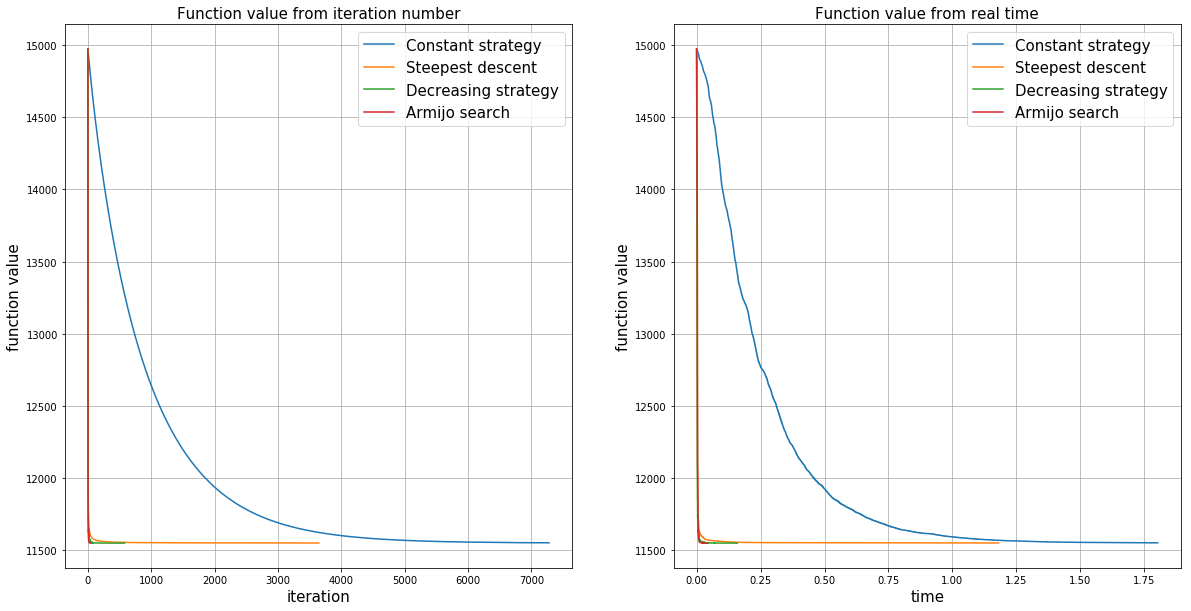

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].plot(np.arange(len(constant_hist)), constant_hist, label='Constant strategy')
ax[0].plot(np.arange(len(steepest_hist)), steepest_hist, label='Steepest descent')
ax[0].plot(np.arange(len(decreasing_hist)), decreasing_hist, label='Decreasing strategy')
ax[0].plot(np.arange(len(Armijo_hist)), Armijo_hist, label='Armijo search')
ax[0].set_title('Function value from iteration number', fontsize=15)
ax[0].set_xlabel('iteration', fontsize=15)
ax[0].set_ylabel('function value', fontsize=15)
ax[0].legend(fontsize=15)
ax[0].grid(True)

ax[1].plot(constant_time, constant_hist, label='Constant strategy')
ax[1].plot(steepest_time, steepest_hist, label='Steepest descent')
ax[1].plot(decreasing_time, decreasing_hist, label='Decreasing strategy')
ax[1].plot(Armijo_time, Armijo_hist, label='Armijo search')
ax[1].set_title('Function value from real time', fontsize=15)
ax[1].set_xlabel('time', fontsize=15)
ax[1].set_ylabel('function value', fontsize=15)
ax[1].legend(fontsize=15)
ax[1].grid(True)

## Задача 4

Для задачи 

$$
\min \frac{1}{2}x^{\top}Ax - b^{\top}x, \quad A \in \mathbb{S}^n_{+}
$$

получите и реализуйте проксимальный метод для её решения.

- Постройте графики сходимости нормы градиента для различных постоянных значений шага $\alpha_k = 10^{-6}, 10^{-5}, \ldots, 1, 10, 100$.
- Как эффективно реализовать один шаг проксимального метода и какая в этом случае сложность у вычисления $x_{k+1}$ для $k = 2, 3, \ldots$?
- Проведите эксперименты для матриц $A$ с числом обусловленности $\kappa = 10, 100, 1000$. Как зависит эффективность проксимального метода от числа обусловленности матрицы $A$? Какой параметр $\alpha_k$ для каждого числа обусловленности даёт самую быструю сходимость? 

In [12]:
from numpy.linalg import norm

alpha_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100]
k_list = [10, 100, 1000]

# генерация задачи:
n = 100
k = k_list[0]
alpha = alpha_list[5]

A = np.random.choice([i for i in range(1, k+1)], size=n)
A[0] = 1
A[1] = k
A = np.diag(A)
b = np.random.choice([i for i in range(1, k+1)], size=n)
x0 = np.zeros(n)

def f(x):
    return 0.5*((A.dot(x)*x).sum()) - (b*x).sum()

def grad(x):
    return A.dot(x)-b

def prox(x):
    return np.linalg.inv(A+np.eye(n)*(1e-4)).dot(b-A.dot(x))

def ProximalMethod(f, gradf, prox, x0, alpha, tol=1e-4):
    x = x0.copy()
    hist = [f(x)]
    grad_norm = [norm(gradf(x))]
    while norm(gradf(x))**2 > tol*norm(gradf(x0))**2:
        x += alpha*prox(x)
        hist.append(f(x))
        grad_norm.append(norm(gradf(x)))
    return x, hist, grad_norm

In [16]:
x_star, hist, grad_norm = ProximalMethod(f, grad, prox, x0, alpha)
print (x_star)

[3.96119008 0.89127161 0.33010023 0.61893854 1.15535172 1.15535172
 2.97089968 0.16505025 1.5844821  0.99030108 2.47574973 2.31070159
 3.46604962 1.18836158 0.49515089 3.30100227 0.61893854 0.49515074
 0.39612053 7.92238017 7.92238017 1.41471655 1.32040196 0.49515074
 1.32040196 0.70735828 1.2732449  0.99030167 0.99030159 0.69321125
 2.47575269 1.18836158 8.91267769 0.39612053 1.65050114 2.22817742
 4.45634951 1.98059978 0.33010023 1.48544984 0.49515089 1.38642184
 1.65050114 1.98060136 2.31070159 0.82525123 0.49515054 1.73302689
 0.59418079 1.98060215 2.64080182 4.95149946 0.39612053 0.86651396
 0.33010023 0.61893854 5.94178513 0.99030068 8.91267769 0.66020116
 0.39612053 0.79224143 0.12378771 3.96119008 1.73302689 2.47574973
 3.96119957 1.78254237 2.47574973 1.41471655 0.49515084 0.33010049
 0.33010049 1.98060136 0.59418107 0.49514995 2.47574973 1.13177324
 1.48545162 4.45634951 0.99030131 0.99030131 0.11003353 0.12378771
 0.49515089 7.92238017 0.61893854 0.82525123 0.16505025 0.3301

## Задача 5

В первом задании Вам было предложено решить задачу неотрицательного матричного разложения для набора изображений с помощью пакета CVXPy. Теперь решите эту же задачу на тех же данных, но с помощью метода проекции градиента. Сравните время и качество работы этого метода с тем, что у Вас получилось при работе с CVXPy. Рассмотрите различные варианты подбора шага. Сделайте вывод о том, какой подход лучше и почему.

In [14]:
# Месть для Вашего решения

## Задача 6

- (0.2 pts) Пусть Вам дано $m$ векторов из $\mathbb{R}^n$, про которых известно что они сгенерированы из некоторого нормального распределения с параметрами $(\mu, \Sigma)$. Более того, известно, что $\Sigma^{-1}$ разрежена, то есть много пар компонент векторов условно независимы. Сгенерируйте данные, которые удовлетворяют этим требованиям для $n = 100$ и $m = 500$. Если последующие пункты будут долго считаться, уменьшите эти параметры
- (0.6 pts) Теперь поставьте задачу поиска оценки матрицы $\Sigma^{-1}$ на основе оценки максимального правдоподобия. [Тут](http://jrmeyer.github.io/machinelearning/2017/08/18/mle.html) описан метод для скалярного случая, Вам надо его обобщить на векторный, в котором вместо дисперсии будет ковариационная матрица. В качестве среднего используйте также оценку максимального правдоподобия.
- Добавьте к Вашей постановке ограничение на то, что матрица $\Sigma^{-1}$ разрежена. Это делается добавлением к целевой функции слагаемого вида $\lambda \sum_{i < j} |(\Sigma^{-1})_{ij}|$, то есть аналог $\ell_1$ регуляризации для задачи наименьших квадратов, только теперь у нас разрежен не вектор, а матрица
- (0.8 pts) Решите поставленную задачу проксимальным градиентным методом и его ускоренной версией. Для этого Вам нужно понять, проксимальный оператор от какой функции Вы будете считать и чему он равен. 
- (0.4 pts) Постройте график сходимости по значениям целевой функции и нарисуйте финальную матрицу $\Sigma^{-1}$ с помощью функции `plt.spy()`. Сравните ответ с точной матрицей, которая использовалась для генерирации данных. Насколько они отличаются? Объясните результат, как он зависит от параметра $\lambda$?

In [15]:
# Месть для Вашего решения